In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np 

In [2]:
# Data Cleaning

In [153]:
artist_df = pd.read_csv("/Users/jason/Desktop/Museam-of-Modern-Art/Artists.csv")
artwork_df = pd.read_csv("/Users/jason/Desktop/Museam-of-Modern-Art/Artworks.csv")

In [4]:
artist_df

,ConstituentID,DisplayName,ArtistBio,Nationality,Gender,BeginDate,EndDate,Wiki QID,ULAN
0,1,Robert Arneson,"American, 1930–1992",American,male,1930,1992,NaN,NaN
1,2,Doroteo Arnaiz,"Spanish, born 1936",Spanish,male,1936,0,NaN,NaN
2,3,Bill Arnold,"American, born 1941",American,male,1941,0,NaN,NaN
3,4,Charles Arnoldi,"American, born 1946",American,male,1946,0,Q1063584,500027998.0
4,5,Per Arnoldi,"Danish, born 1941",Danish,male,1941,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
15633,138522,Erwin Heerich,"German, 1922 – 2004",German,male,1922,2004,NaN,NaN
15634,138540,Rafael Rivera García,"Puerto Rican, 1929 – 2014",Puerto Rican,male,1929,2014,NaN,NaN
15635,138541,Rafael López del Campo,"Puerto Rican, 1936 – 2009",Puerto Rican,male,1936,2009,NaN,NaN
15636,138544,Efrain Lopez,"Puerto Rican, 1940 – 1993",Puerto Rican,male,1940,1993,NaN,NaN


In [5]:
artist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15638 entries, 0 to 15637
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ConstituentID  15638 non-null  int64  
 1   DisplayName    15638 non-null  object 
 2   ArtistBio      13438 non-null  object 
 3   Nationality    13142 non-null  object 
 4   Gender         12381 non-null  object 
 5   BeginDate      15638 non-null  int64  
 6   EndDate        15638 non-null  int64  
 7   Wiki QID       3247 non-null   object 
 8   ULAN           2931 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 1.1+ MB


In [6]:
artist_df.EndDate.value_counts()

EndDate
0       10035
1991       91
1999       89
2004       88
2005       87
        ...  
1795        1
1888        1
1869        1
1855        1
1852        1
Name: count, Length: 173, dtype: int64

In [7]:
artist_df['EndDate2'] = artist_df['ArtistBio'].str.extract(r'(?i)\bborn\s+(\d{4})')

In [8]:
artist_df.EndDate2.isna().sum()

10005

In [9]:
artist_df["FinalEndDate"] = artist_df["EndDate"].fillna(artist_df["EndDate2"])

In [10]:
artist_df["FinalEndDate"] = np.where(artist_df["EndDate"] == 0, artist_df["EndDate2"], artist_df["EndDate"])

In [11]:
artist_df.FinalEndDate = artist_df.FinalEndDate.fillna(0)

In [12]:
artist_df.FinalEndDate.value_counts()

FinalEndDate
0       4412
1942     144
1941     137
1946     134
1947     132
        ... 
1865       1
1855       1
1873       1
1881       1
1821       1
Name: count, Length: 290, dtype: int64

In [13]:
artwork_df

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,OnView,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)
0,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",Otto Wagner,6210,"(Austrian, 1841–1918)",(Austrian),(1841),(1918),(male),1896,Ink and cut-and-pasted painted pages on paper,...,NaN,NaN,NaN,NaN,48.600000,NaN,NaN,168.900000,NaN,NaN
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,7470,"(French, born 1944)",(French),(1944),(0),(male),1987,Paint and colored pencil on print,...,NaN,NaN,NaN,NaN,40.640100,NaN,NaN,29.845100,NaN,NaN
2,"Villa project, outside Vienna, Austria (Elevat...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(male),1903,"Graphite, pen, color pencil, ink, and gouache ...",...,NaN,NaN,NaN,NaN,34.300000,NaN,NaN,31.800000,NaN,NaN
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(),(1944),(0),(male),1980,Photographic reproduction with colored synthet...,...,NaN,NaN,NaN,NaN,50.800000,NaN,NaN,50.800000,NaN,NaN
4,"Villa project, outside Vienna, Austria (Exteri...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(male),1903,"Graphite, color pencil, ink, and gouache on tr...",...,NaN,NaN,NaN,NaN,38.400000,NaN,NaN,19.100000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157625,Untitled,Adam Pendleton,38901,"(American, born 1984)",(American),(1984),(0),(male),2021,Silkscreen ink on Mylar,...,NaN,NaN,NaN,NaN,96.520193,NaN,NaN,73.660147,NaN,NaN
157626,Untitled,Adam Pendleton,38901,"(American, born 1984)",(American),(1984),(0),(male),2021,Silkscreen ink on Mylar,...,NaN,NaN,NaN,NaN,96.520193,NaN,NaN,73.660147,NaN,NaN
157627,Untitled,Adam Pendleton,38901,"(American, born 1984)",(American),(1984),(0),(male),2021,Silkscreen ink on Mylar,...,NaN,NaN,NaN,NaN,96.520193,NaN,NaN,73.660147,NaN,NaN
157628,Untitled,Adam Pendleton,38901,"(American, born 1984)",(American),(1984),(0),(male),2021,Silkscreen ink on Mylar,...,NaN,NaN,NaN,NaN,96.520193,NaN,NaN,73.660147,NaN,NaN


In [14]:
artwork_df.Medium.value_counts()

Medium
Gelatin silver print                                                                                                                                                                                                                                              17012
Lithograph                                                                                                                                                                                                                                                         8633
Pencil on paper                                                                                                                                                                                                                                                    7233
Albumen silver print                                                                                                                                                                                     

In [15]:
artwork_df.ObjectID.nunique()

157630

In [16]:
artwork_df.Classification.nunique()

39

In [17]:
artwork_df.Nationality.nunique()

1120

# T1

## Dashboard

In [18]:
import dash
from dash import html

In [19]:
app = dash.Dash(__name__)

def combined_card_1(metrics, bg_colour="#2D2D2D", text_colour="#FFFFFF"):
    return html.Div(
        style={
            'backgroundColor': bg_colour,
            'color': text_colour, 
            'borderRadius': '15px',
            'padding': '20px',
            'width': '250px', 
            'boxShadow': '0px 4px 10px rgba(0, 0, 0, 0.5)',
            'margin': '5px',
            'border': '1px solid #444444',
            'fontFamily': 'Roboto, sans-serif'             
        },
        children=[
            html.H2('Dataset', style={'fontSize':'25px','marginTop': '0px' ,'marginBottom': '20px', 'color': '#858383'}),
            html.Div([
                html.P(f"Artists.csv Rows: {metrics['artist_num_feats']}"),
                html.P(f"Artworks.csv Rows: {metrics['artwork_num_feats']}", style={'margin': '10px 0'}),
                html.P(f"Memory: {metrics['memory']}"),
            ], style={'textAlign': 'left', 'fontSize': '16px'})
        ]
    )
def combined_card_2(metrics, bg_colour="#2D2D2D", text_colour="#FFFFFF"):
    return html.Div(
        style={
            'backgroundColor': bg_colour,
            'color': text_colour,
            'borderRadius': '15px',
            'padding': '20px',
            'width': '250px',
            'boxShadow': '0px 4px 10px rgba(0, 0, 0, 0.5)',
            'margin': '5px',
            'border': '1px solid #444444',
            'fontFamily': 'Roboto, sans-serif',
        },
        children=[
            html.H2('Artists', style={'fontSize': '25px','marginTop': '0px', 'marginBottom': '0px', 'color': '#858383', 'textAlign': 'center'}),
            html.Div([
                html.P(f"{metrics['num_artists']}"),
            ], style={'textAlign': 'center', 'fontSize': '35px', 'marginTop': '0px', 'marginBottom': '0px'})
        ]
    )

def combined_card_3(metrics, bg_color='#2D2D2D', text_colour='#FFFFFF'):
    return html.Div(
        style={
            'backgroundColor': bg_color,
            'color': text_colour,
            'borderRadius': '15px',
            'padding': '20px',
            'width': '250px',
            'boxShadow': '0px 4px 10px rgba(0, 0, 0, 0.5)',
            'margin': '5px',
            'border': '1px solid #444444',
            'fontFamily': 'Roboto, sans-serif',
        },
        children=[
            html.H2('Artworks', style={'fontSize': '25px','marginTop': '0px', 'marginBottom': '0px', 'color': '#858383', 'textAlign': 'center'}),
            html.Div([
                html.P(f"{metrics['num_artworks']}"),
        ], style = {'textAlign': 'center', 'fontSize': '35px', 'marginTop': '0px', 'marginBottom': '0px'})
    ]
)

def combined_card_4(metrics, bg_color= '#2D2D2D', text_colour='#FFFFFF'):
    return html.Div(
        style={
            'backgroundColor': bg_color,
            'color': text_colour,
            'borderRadius': '15px',
            'padding': '20px',
            'width': '250px',
            'boxShadow': '0px 4px 10px rgba(0, 0, 0, 0.5)',
            'margin': '5px',
            'border': '1px solid #444444',
            'fontFamily': 'Roboto, sans-serif',
        }, 
        children=[
            html.H2('Nationalities', style={'fontSize': '25px','marginTop': '0px', 'marginBottom': '0px', 'color': '#858383', 'textAlign': 'center'}),
            html.Div([
                html.P(f"{metrics['num_nationalities']}"),
        ], style = {'textAlign': 'center', 'fontSize': '35px', 'marginTop': '0px', 'marginBottom': '0px'})
    ]
)

def combined_card_5(metrics, bg_color= '#2D2D2D', text_colour='#FFFFFF'):
    return html.Div(
        style={
            'backgroundColor': bg_color,
            'color': text_colour,
            'borderRadius': '15px',
            'padding': '20px',
            'width': '250px',
            'boxShadow': '0px 4px 10px rgba(0, 0, 0, 0.5)',
            'margin': '5px',
            'border': '1px solid #444444',
            'fontFamily': 'Roboto, sans-serif',
        }, 
        children=[
            html.H2('Classifications', style={'fontSize': '25px','marginTop': '0px', 'marginBottom': '0px', 'color': '#858383', 'textAlign': 'center'}),
            html.Div([
                html.P(f"{metrics['num_classifications']}"),
        ], style = {'textAlign': 'center', 'fontSize': '35px', 'marginTop': '0px', 'marginBottom': '0px'})
    ]
)

artist_num_feats = "{:,}".format(len(artist_df))
artwork_num_feats = "{:,}".format(len(artwork_df))
memory = "72MB"
num_artists = "{:,}".format(len(artist_df))
num_artworks = "{:,}".format(artwork_df.ObjectID.nunique())
num_nationalities = artist_df.Nationality.nunique()
num_classifications = artist_df.Nationality.nunique()

app.layout = html.Div(
    style={
        'display': 'flex',
        'justifyContent': 'center',
        'alignItems': 'center',
        'flexWrap': 'nowrap',
        'gap': '20px',
        'backgroundColor': '#1E1E1E', 
        'padding': '20px'
    },
    children=[
        combined_card_1(metrics={
            "artist_num_feats": artist_num_feats,
            "artwork_num_feats": artwork_num_feats,
            "memory": memory,
        }),
        combined_card_2(metrics={
            "num_artists": num_artists,
        }),
        combined_card_3(metrics={
            "num_artworks": num_artworks,
        }),
        combined_card_4(metrics={
            "num_nationalities": num_nationalities,
        }),
        combined_card_5(metrics={
            "num_classifications": num_classifications,
        }),
    ]
)

if __name__ == '__main__':
    app.run_server(debug=True)

## T1 Figures

In [20]:
import plotly.express as px

In [21]:
artwork_df['painting_size'] = artwork_df['Height (cm)']* artwork_df['Width (cm)']

In [22]:
artwork_df['Date'] = artwork_df['Date'].replace('n.d.', '0')
artwork_df['Date'] = artwork_df['Date'].str.split('-').str[0]
artwork_df['Date'] = artwork_df['Date'].str.split('.').str[0]
artwork_df['Date'] = pd.to_numeric(artwork_df['Date'], errors='coerce')

In [23]:
artwork_df['decades'] = artwork_df['Date'] // 10 * 10

In [24]:
average_painting_size = artwork_df.groupby('decades', as_index=False)['painting_size'].mean()

In [25]:
artwork_df

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.),painting_size,decades
0,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",Otto Wagner,6210,"(Austrian, 1841–1918)",(Austrian),(1841),(1918),(male),1896.0,Ink and cut-and-pasted painted pages on paper,...,NaN,NaN,48.600000,NaN,NaN,168.900000,NaN,NaN,8208.540000,1890.0
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,7470,"(French, born 1944)",(French),(1944),(0),(male),1987.0,Paint and colored pencil on print,...,NaN,NaN,40.640100,NaN,NaN,29.845100,NaN,NaN,1212.907849,1980.0
2,"Villa project, outside Vienna, Austria (Elevat...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(male),1903.0,"Graphite, pen, color pencil, ink, and gouache ...",...,NaN,NaN,34.300000,NaN,NaN,31.800000,NaN,NaN,1090.740000,1900.0
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(),(1944),(0),(male),1980.0,Photographic reproduction with colored synthet...,...,NaN,NaN,50.800000,NaN,NaN,50.800000,NaN,NaN,2580.640000,1980.0
4,"Villa project, outside Vienna, Austria (Exteri...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(male),1903.0,"Graphite, color pencil, ink, and gouache on tr...",...,NaN,NaN,38.400000,NaN,NaN,19.100000,NaN,NaN,733.440000,1900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157625,Untitled,Adam Pendleton,38901,"(American, born 1984)",(American),(1984),(0),(male),2021.0,Silkscreen ink on Mylar,...,NaN,NaN,96.520193,NaN,NaN,73.660147,NaN,NaN,7109.691639,2020.0
157626,Untitled,Adam Pendleton,38901,"(American, born 1984)",(American),(1984),(0),(male),2021.0,Silkscreen ink on Mylar,...,NaN,NaN,96.520193,NaN,NaN,73.660147,NaN,NaN,7109.691639,2020.0
157627,Untitled,Adam Pendleton,38901,"(American, born 1984)",(American),(1984),(0),(male),2021.0,Silkscreen ink on Mylar,...,NaN,NaN,96.520193,NaN,NaN,73.660147,NaN,NaN,7109.691639,2020.0
157628,Untitled,Adam Pendleton,38901,"(American, born 1984)",(American),(1984),(0),(male),2021.0,Silkscreen ink on Mylar,...,NaN,NaN,96.520193,NaN,NaN,73.660147,NaN,NaN,7109.691639,2020.0


In [26]:
average_painting_size

,decades,painting_size
0,0.0,1708.861432
1,1760.0,309.120000
2,1780.0,69.160000
3,1790.0,324.006543
4,1800.0,253.480000
5,1810.0,129.660804
6,1820.0,584.502105
7,1830.0,393.730000
8,1840.0,258.102053
9,1850.0,450.743979


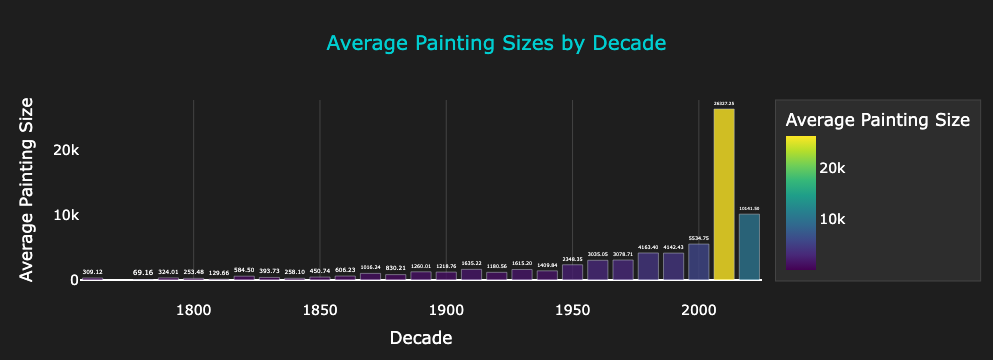

In [81]:
average_painting_size = artwork_df.groupby('decades', as_index=False)['painting_size'].mean()
filtered_data = average_painting_size[average_painting_size['decades'] >= 1700]

T1fig1 = px.bar(
    filtered_data,
    x='decades',          
    y='painting_size',
    text='painting_size',     
    title="Average Painting Sizes by Decade",  
    color='painting_size',     
    color_continuous_scale=px.colors.sequential.Viridis 
)

T1fig1.update_traces(
    texttemplate='%{text:.2f}', 
    textposition='outside',     
    marker=dict(opacity=0.8)    
)

T1fig1.update_layout(
    plot_bgcolor="#1E1E1E",      
    paper_bgcolor="#1E1E1E",    
    font=dict(color="#FFFFFF", size=14), 
    title=dict(font=dict(size=20, color="#00CED1"), x=0.5),
    xaxis=dict(
        title="Decade",     
        color="#FFFFFF",       
        gridcolor="#444444", 
        zeroline=False,
        ticklabelstandoff=20
    ),
    yaxis=dict(
        title="Average Painting Size",   
        color="#FFFFFF",       
        showgrid=False          
    ),
    coloraxis_colorbar=dict(
        title="Average Painting Size",  
        tickcolor="#FFFFFF",   
        titlefont=dict(color="#FFFFFF"), 
        bgcolor="#2D2D2D",      
        bordercolor="#444444",   
        borderwidth=1         
    )
)

T1fig1.show()

In [28]:
artwork_df['DateAcquired'] = artwork_df['DateAcquired'].str.split('-').str[0]

In [29]:
artwork_df['DateAcquired'] = pd.to_numeric(artwork_df['DateAcquired'])

In [30]:
artwork_df

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.),painting_size,decades
0,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",Otto Wagner,6210,"(Austrian, 1841–1918)",(Austrian),(1841),(1918),(male),1896.0,Ink and cut-and-pasted painted pages on paper,...,NaN,NaN,48.600000,NaN,NaN,168.900000,NaN,NaN,8208.540000,1890.0
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,7470,"(French, born 1944)",(French),(1944),(0),(male),1987.0,Paint and colored pencil on print,...,NaN,NaN,40.640100,NaN,NaN,29.845100,NaN,NaN,1212.907849,1980.0
2,"Villa project, outside Vienna, Austria (Elevat...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(male),1903.0,"Graphite, pen, color pencil, ink, and gouache ...",...,NaN,NaN,34.300000,NaN,NaN,31.800000,NaN,NaN,1090.740000,1900.0
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(),(1944),(0),(male),1980.0,Photographic reproduction with colored synthet...,...,NaN,NaN,50.800000,NaN,NaN,50.800000,NaN,NaN,2580.640000,1980.0
4,"Villa project, outside Vienna, Austria (Exteri...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(male),1903.0,"Graphite, color pencil, ink, and gouache on tr...",...,NaN,NaN,38.400000,NaN,NaN,19.100000,NaN,NaN,733.440000,1900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157625,Untitled,Adam Pendleton,38901,"(American, born 1984)",(American),(1984),(0),(male),2021.0,Silkscreen ink on Mylar,...,NaN,NaN,96.520193,NaN,NaN,73.660147,NaN,NaN,7109.691639,2020.0
157626,Untitled,Adam Pendleton,38901,"(American, born 1984)",(American),(1984),(0),(male),2021.0,Silkscreen ink on Mylar,...,NaN,NaN,96.520193,NaN,NaN,73.660147,NaN,NaN,7109.691639,2020.0
157627,Untitled,Adam Pendleton,38901,"(American, born 1984)",(American),(1984),(0),(male),2021.0,Silkscreen ink on Mylar,...,NaN,NaN,96.520193,NaN,NaN,73.660147,NaN,NaN,7109.691639,2020.0
157628,Untitled,Adam Pendleton,38901,"(American, born 1984)",(American),(1984),(0),(male),2021.0,Silkscreen ink on Mylar,...,NaN,NaN,96.520193,NaN,NaN,73.660147,NaN,NaN,7109.691639,2020.0


In [31]:
average_acquisitions_size = artwork_df.groupby('decades', as_index=False)['DateAcquired'].count()
filtered_DateAcquired_data = average_acquisitions_size[average_acquisitions_size['decades'] >= 1760]

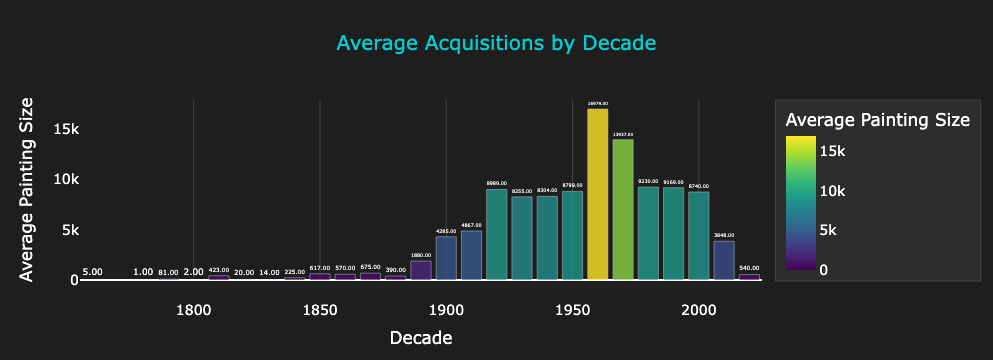

In [80]:
T1fig2 = px.bar(
    filtered_DateAcquired_data,
    x='decades',              
    y='DateAcquired',     
    text='DateAcquired',      
    title="Average Acquisitions by Decade", 
    color='DateAcquired',   
    color_continuous_scale=px.colors.sequential.Viridis  
)


T1fig2.update_traces(
    texttemplate='%{text:.2f}', 
    textposition='outside',     
    marker=dict(opacity=0.8)    
)

T1fig2.update_layout(
    plot_bgcolor="#1E1E1E",      
    paper_bgcolor="#1E1E1E",    
    font=dict(color="#FFFFFF", size=14), 
    title=dict(font=dict(size=20, color="#00CED1"), x=0.5),
    xaxis=dict(
        title="Decade",     
        color="#FFFFFF",       
        gridcolor="#444444", 
        zeroline=False,
        ticklabelstandoff=20
    ),
    yaxis=dict(
        title="Average Painting Size",   
        color="#FFFFFF",       
        showgrid=False          
    ),
    coloraxis_colorbar=dict(
        title="Average Painting Size",  
        tickcolor="#FFFFFF",   
        titlefont=dict(color="#FFFFFF"), 
        bgcolor="#2D2D2D",      
        bordercolor="#444444",   
        borderwidth=1         
    )
)

T1fig2.show()

In [45]:
top_classifications = artwork_df['Classification'].value_counts().head(5).reset_index()
top_classifications.columns = ['Classification', 'Count']

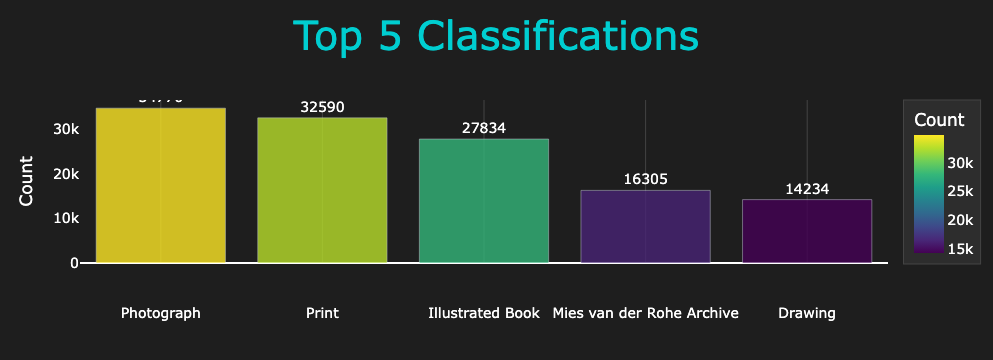

In [77]:
T1fig3 = px.bar(
    top_classifications,
    x='Classification',
    y='Count',
    text='Count',
    title="Top 5 Classifications",
    color='Count',
    color_continuous_scale=px.colors.sequential.Viridis
)

T1fig3.update_traces(
    texttemplate='%{text:.0f}',
    textposition='outside',
    marker=dict(opacity=0.8)
)

T1fig3.update_layout(
    plot_bgcolor="#1E1E1E",
    paper_bgcolor="#1E1E1E",
    font=dict(color="#FFFFFF", size=14),
    title=dict(font=dict(size=40, color="#00CED1"), x=0.5),
    xaxis=dict(
        title="",
        color="#FFFFFF",
        gridcolor="#444444",
        zeroline=False,
        ticklabelstandoff=40
    ),
    yaxis=dict(
        title="Count",
        color="#FFFFFF",
        showgrid=False
    ),
    coloraxis_colorbar=dict(
        title="Count",
        tickcolor="#FFFFFF",
        titlefont=dict(color="#FFFFFF"),
        bgcolor="#2D2D2D",
        bordercolor="#444444",
        borderwidth=1
    ),
    height=600 
)

T1fig3.show()

In [103]:
artwork_df.Gender.value_counts()

Gender
(male)                                                                                                                                                                                                                       121010
(female)                                                                                                                                                                                                                      19608
()                                                                                                                                                                                                                             7750
(male) (male)                                                                                                                                                                                                                  1706
(male) (male) (male)                                                             

In [154]:
def classify_only_male(gender):
    if not isinstance(gender, str):  
        return gender
    gender = gender.lower()  
    if "male" in gender and "female" not in gender:  
        return "Male"
    return gender  
artwork_df['Gender'] = artwork_df['Gender'].apply(classify_only_male)

In [155]:
artwork_df['Gender'].value_counts()

Gender
Male                                                                                            125785
(female)                                                                                         19608
()                                                                                                7750
(male) (female)                                                                                    945
(female) (male)                                                                                    383
                                                                                                 ...  
(male) (female) (male) (male) (male) (male) (male) () (male) (male) () (male)                        1
(female) (male) (female) (male) (male) (female) (male) (male) (male) (male) (male) (male) ()         1
(female) () () (male) (male) (male) (male) (male) (male) (male) () (male) (male) (male)              1
(male) (male) (male) (male) (male) (male) (male) (male) (female) (

In [156]:
def classify_only_male(gender):
    if not isinstance(gender, str):  
        return gender
    if "female" in gender:  
        return "Female"
    return gender  
artwork_df['Gender'] = artwork_df['Gender'].apply(classify_only_male)

In [157]:
artwork_df['Gender'].value_counts()

Gender
Male                       125785
Female                      22625
()                           7750
() ()                         155
() () ()                       25
(non-binary)                   12
() () () () ()                  3
() () () ()                     2
(gender non-conforming)         2
() () () () () ()               1
(transgender woman)             1
Name: count, dtype: int64

In [158]:
def classify_only_male(gender):
    if not isinstance(gender, str):  
        return gender
    if "()" in gender:  
        return "Unkown"
    return gender  
artwork_df['Gender'] = artwork_df['Gender'].apply(classify_only_male)

In [159]:
artwork_df['Gender'].value_counts()

Gender
Male                       125785
Female                      22625
Unkown                       7936
(non-binary)                   12
(gender non-conforming)         2
(transgender woman)             1
Name: count, dtype: int64

In [161]:
def classify_only_male(gender):
    if not isinstance(gender, str):  
        return "Other"  
    if "Male" in gender or "Female" in gender or "Unkown" in gender:  
        return gender
    return "Other" 
artwork_df['Gender'] = artwork_df['Gender'].apply(classify_only_male)

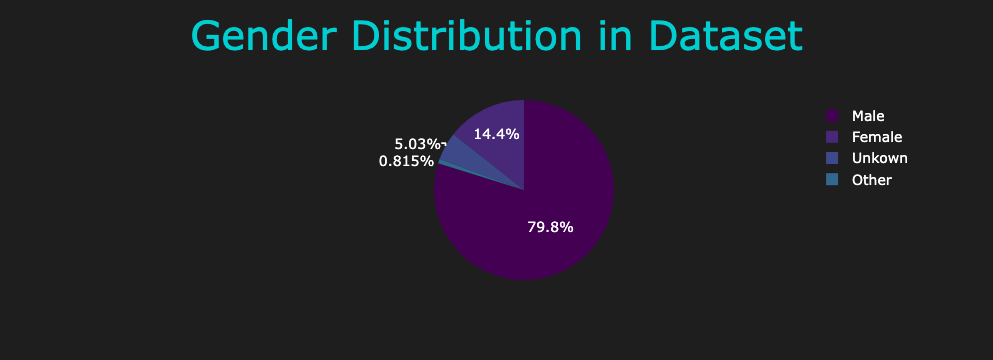

In [162]:
gender_counts = artwork_df['Gender'].value_counts().reset_index()
gender_counts.columns = ['Gender', 'Count']

T1fig4 = px.pie(
    gender_counts,
    names='Gender',            
    values='Count',             
    title="Gender Distribution in Dataset",  
    color='Gender',     
    color_discrete_sequence=px.colors.sequential.Viridis  
)

T1fig4.update_layout(
    plot_bgcolor="#1E1E1E",      
    paper_bgcolor="#1E1E1E",
    font=dict(color="#FFFFFF", size=14),  
    title=dict(font=dict(size=40, color="#00CED1"), x=0.5) 
)

T1fig4.show()

In [ ]:
Test